# ARMA Models - Lab

## Introduction

In this lab, you'll practice your knowledge the Autoregressive (AR), the Moving Average (MA) model, and the combined ARMA model.

## Objectives

You will be able to:
- Understand and explain what a Autoregressive model is
- Understand and explain what a Moving Average model is
- Understand and apply the mathematical formulations for Autoregressive and Moving Average models
- Understand how AR and MA can be combined in ARMA models

## Generate an AR model of the first order with $\phi = 0.7$

In [11]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 2. Make sure you have a daily datetime index ranging from January 2017 until the end of March 2018. Assume that $\mu=5$ and $Y_0= 8$.


In [3]:
# keep the random seed
np.random.seed(11225)
# create a series with the specified dates
date = pd.date_range(start = '2017-01-01', end = '2018-03-31', freq = 'd')

In [4]:
# store the parameters
µ = 5
Y0 = 8
e_µ = 0
e_s = 2
phi = 0.2

In [16]:
# generate the time series according to the formula
data = [Y0]
for i in range(1,len(date)):
    y = data[i-1]-µ
    Yi = µ + phi*y + float(np.random.normal(loc = e_µ, scale = e_s, size = 1))
    data.append(Yi)
df = pd.DataFrame(data=data,index=date,columns=['AR'])

Plot the time series and verify what you see

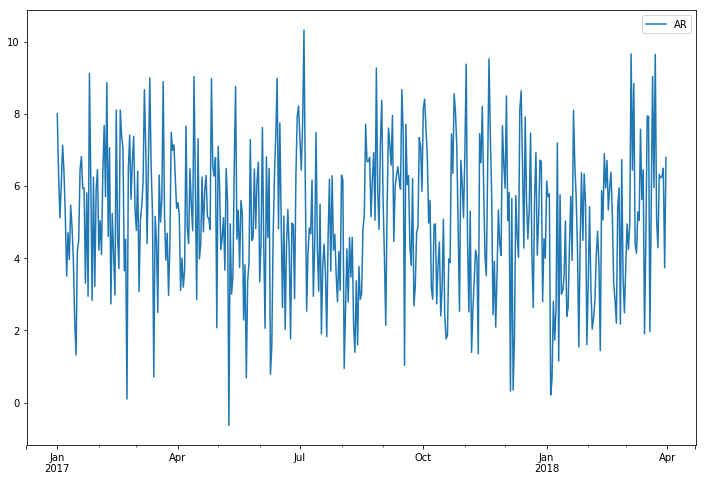

In [17]:
# plot here
df.plot();

## Look at the ACF and PACF of your model and write down your conclusions

We recommend to use `plot_acf` in statsmodels instead of the pandas ACF variant.

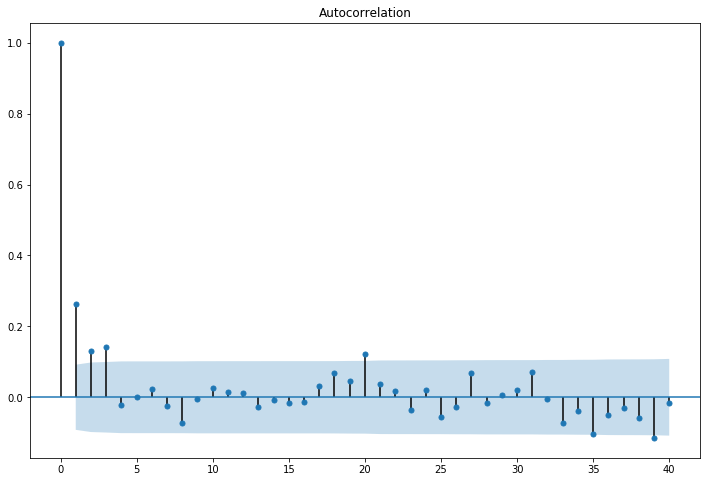

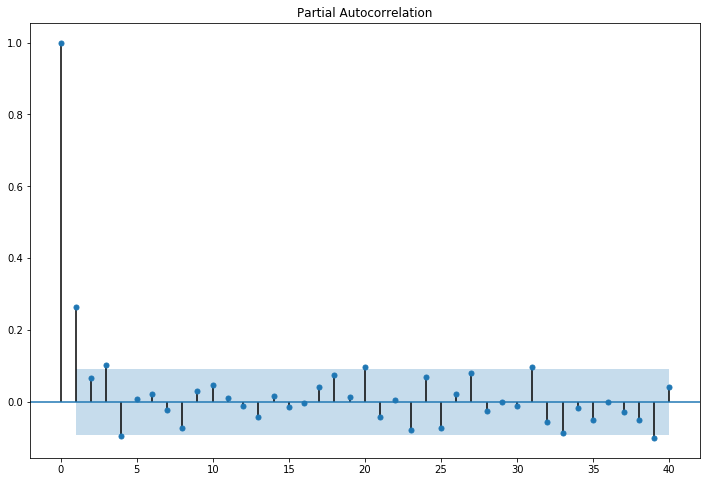

In [18]:
plot_acf(df,lags = 40);
plot_pacf(df,lags = 40);

## Check your model with ARMA in statsmodels

Statsmodels also has a tool that fits ARMA models on time series. The only thing you have to do is provide the number of orders for AR vs MA. Have a look at the code below, and the output of the code. Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect!

In [19]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(df.AR, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

const       5.071688
ar.L1.AR    0.264508
dtype: float64


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future th

## Generate an MA model of the first order with $\theta = 0.9$

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. Make sure you have a daily datetime index is ranging from April 2015 until the end of August 2015. Assume that $\mu=7$.

In [74]:
# keep the random seed
np.random.seed(1234)
# create a series with the specified dates
date = pd.date_range(start='2015-04-01',end='2015-08-31',freq='d')
# store the parameters
error = np.random.normal(loc=0,scale=4,size=len(date))
mu = 7
theta = 0.9
#generate the time series
prev_error = error[0]
data = [None] * len(dates)
for i,row in enumerate(date):
    data[i] = mu + theta * prev_error +error[i]
    prev_error = error[i]
df = pd.DataFrame(data = data, index = date, columns = ['MA'])

In [75]:
# keep the random seed
np.random.seed(1234)

# create a series with the specified dates
dates = pd.date_range('2015-04-01', '2015-08-31')

error = np.random.normal(0,4,len(dates))
mu = 7
theta = 0.9

TS = [None] * len(dates)
error_prev = error[0]
for i, row in enumerate(dates):
    TS[i] = mu + theta * error_prev +error[i]
    error_prev = error[i]

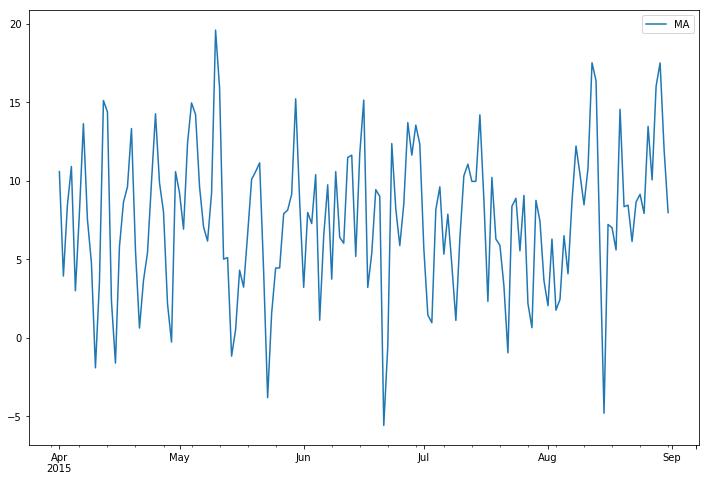

In [77]:
# Plot the time series
df.plot();

## Look at the ACF and PACF of your model and write down your conclusions

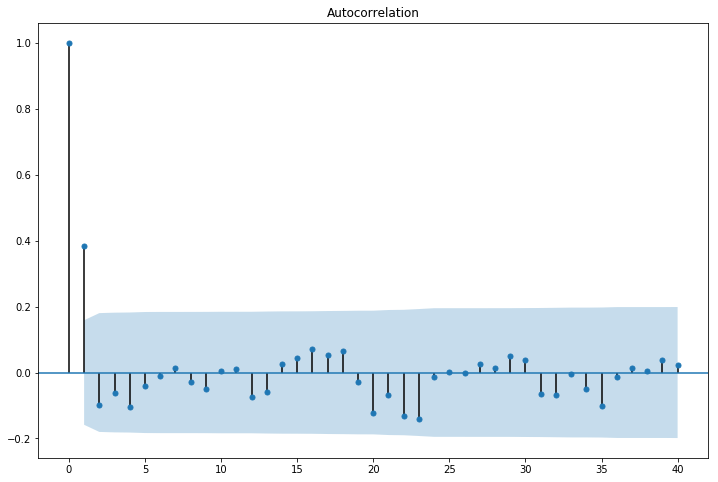

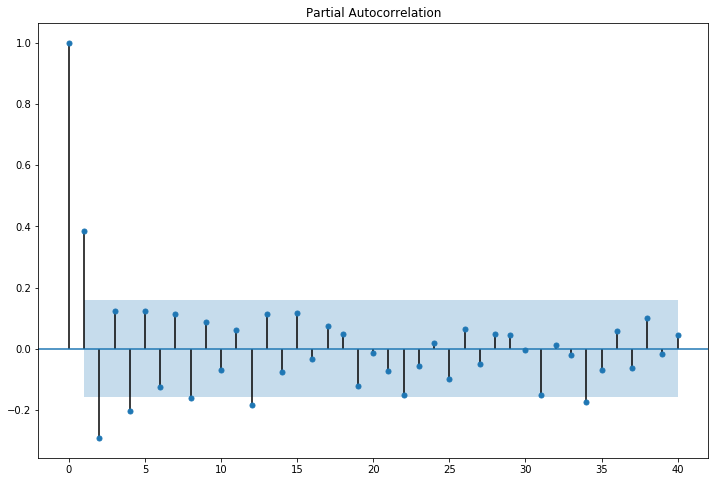

In [78]:
# plots here
plot_acf(df, lags = 40);
plot_pacf(df, lags = 40);

## Check your model with ARMA in statsmodels

Repeat what you did for your AR model but now for your MA model to verify the parameters are estimated correctly.

In [79]:
# Fit an AR(1) model to the first simulated data
mod_arma = ARMA(df.MA, order=(0,1))
res_arma = mod_arma.fit()
res_arma.summary()

# Print out summary information on the fit


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                     MA   No. Observations:                  153
Model:                     ARMA(0, 1)   Log Likelihood                -426.378
Method:                       css-mle   S.D. of innovations              3.909
Date:                Fri, 08 Mar 2019   AIC                            858.757
Time:                        15:49:06   BIC                            867.848
Sample:                    04-01-2015   HQIC                           862.450
                         - 08-31-2015                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5373      0.590     12.776      0.000       6.381       8.694
ma.L1.MA       0.8727      0.051     17.165      0.000       0.773       0.972
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.1459           +0.0000j            1.1459            0.5000
-----------------------------------------------------------------------------
"""

## Create a model for the 400m data set

Import the data set containing the historical running times for the men's 400m on the Olympic games.

In [80]:
# the data is in "winning_400m.csv"
df = pd.read_csv('winning_400m.csv', index_col = [0], parse_dates=[0])

Plot the data

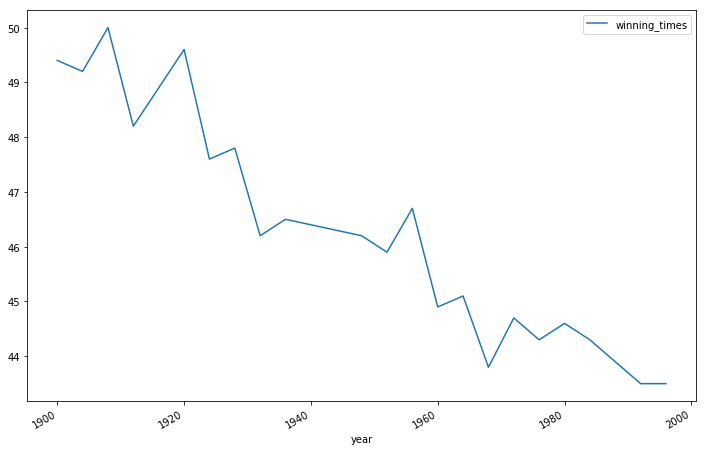

In [82]:
# your code here
df.plot();

Difference the data to get a stationary time series. Make sure to remove the first NaN value.

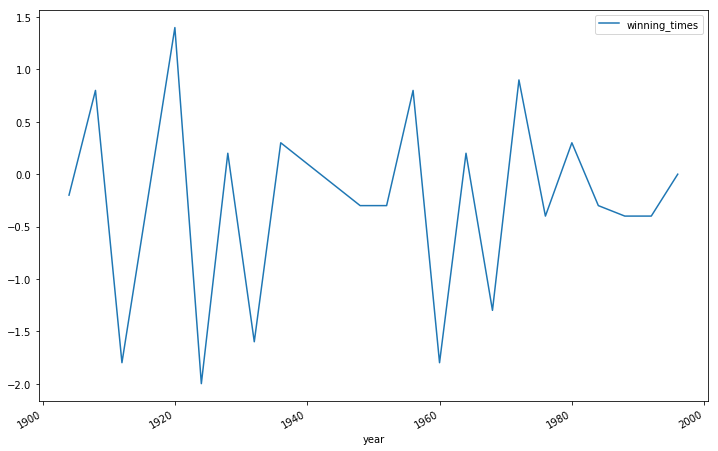

In [98]:
# your code here
df_diff = df.diff().dropna()
df_diff.plot()

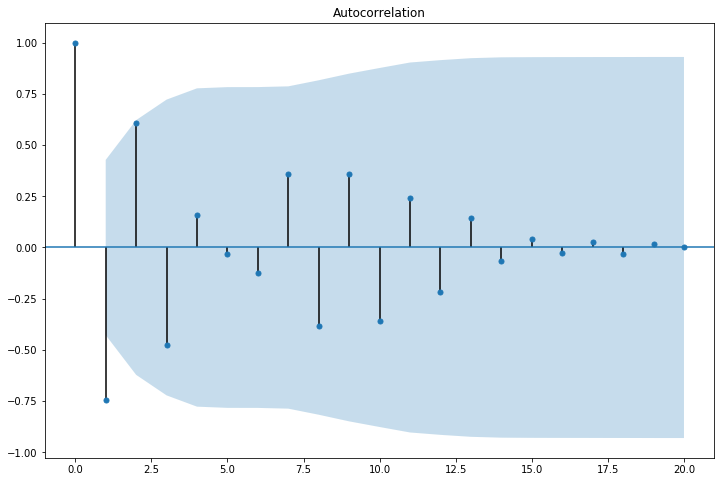

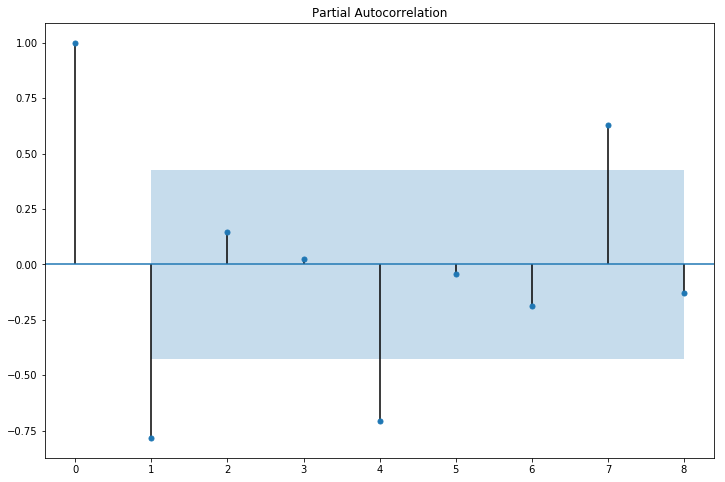

In [96]:
# Look at ACF and PACF
plot_acf(df_diff);
plot_pacf(df_diff, lags = 8);

Based on the ACF and PACF, fit an arma model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [97]:
# your code here
mod = ARMA(df_diff, order = (2,1)).fit()
mod.summary()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 1)   Log Likelihood                 -18.955
Method:                       css-mle   S.D. of innovations              0.562
Date:                Fri, 08 Mar 2019   AIC                             47.911
Time:                        15:55:18   BIC                             53.133
Sample:                             0   HQIC                            49.044
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2916      0.073     -4.018      0.001      -0.434      -0.149
ar.L1.winning_times    -1.6827      0.119    -14.199      0.000      -1.915      -1.450
ar.L2.winning_times    -0.7714      0.128     -6.022      0.000      -1.022      -0.520
ma.L1.winning_times     0.9999      0.132      7.550      0.000       0.740       1.259
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0907           -0.3268j            1.1386           -0.4537
AR.2           -1.0907           +0.3268j            1.1386            0.4537
MA.1           -1.0001           +0.0000j            1.0001            0.5000
-----------------------------------------------------------------------------
"""

In [100]:
# Try another one
mod = ARMA(df_diff.winning_times, order = (1,0)).fit()
mod.summary()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an erro

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Fri, 08 Mar 2019   AIC                             46.107
Time:                        16:01:39   BIC                             49.241
Sample:                             0   HQIC                            46.787
                                                                              
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.002      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3916           +0.0000j            1.3916            0.5000
-----------------------------------------------------------------------------
"""

## What is your final model? Why did you pick this model?

The final model is an AR(1) model. I think it is more likely that the time of the previous winner influences the time of the current 

## Summary

Great! Now that you know the ins and outs of ARMA models and you've practiced your modeling knowledge.